# Capstone Webscrapping using BeautifulSoup

This notebook contains guidances & tasks on the data processing for the application

## background

This module was developed as one of the Capstone Project from Algoritma Academy. In this module, we will learn to do simple Webscrapping using BeautifulSoup which is one of the libraries from Python. As an exercise, we will use US Dollar to Rupiah exchange rate data from https://www.exchange-rates.org/history/IDR/USD/T to plot the USD movement and display the result in the Flask Dashboard.

## Requesting the Data and Creating a BeautifulSoup

Let's begin with requesting the web from the site with `get` method.

In [312]:
import requests

url_get = requests.get('https://www.exchange-rates.org/history/IDR/USD/T')

To visualize what exactly we get from the `request.get`, we can use .content to see what we exactly get, here I slice it so it won't make our screen full of the html we get from the page. You can delete the slicing if you want to see what we fully get.

In [313]:
url_get.content[1:500]

b'!DOCTYPE html>\r\n<!--[if lt IE 9]>\r\n<html class="no-js ie8 oldie" lang="en" xml:lang=\'en\'>\r\n<![endif]-->\r\n<!--[if gt IE 8]><!--><html class="no-js" lang="en" xml:lang=\'en\'><!--<![endif]-->\r\n<head>\r\n<title>Indonesian Rupiah Exchange Rate - US Dollar - Historical Exchange Rates</title>\r\n<meta http-equiv="X-UA-Compatible" content="IE=edge">\r\n<meta name="viewport" content="width=device-width, initial-scale=1, maximum-scale=5">\r\n<meta charset="utf-8" /><meta http-equiv="Content-Type" content="text/ht'

As we can see we get a very unstructured and complex html, which actually contains the codes needed to show the webpages on your web browser. But we as human still confused what and where we can use that piece of code, so here where we use the beautifulsoup. Beautiful soup class will result a beautifulsoup object. Beautiful Soup transforms a complex HTML document into a complex tree of Python objects. 

Let's make Beautiful soup object and feel free to explore the object here.

In [314]:
from bs4 import BeautifulSoup 

soup = BeautifulSoup(url_get.content,"html.parser")
print(type(soup))

<class 'bs4.BeautifulSoup'>


## Finding the right key to scrap the data & Extracting the right information

Find the key and put the key into the `.find()` Put all the exploring the right key at this cell. (please change this markdown with your explanation)

In [315]:
table = soup.find('table', attrs={'class':'table table-striped table-hover table-hover-solid-row table-simple history-data'})
print(table.prettify()[1:500])

table class="table table-striped table-hover table-hover-solid-row table-simple history-data">
 <tbody>
  <tr>
   <td>
    7/8/2022
   </td>
   <td>
    Friday
   </td>
   <td>
    <a href="/Rate/USD/IDR/7-8-2022">
     14,976.95000
    </a>
    IDR
   </td>
   <td class="text-narrow-screen-hidden">
    <a href="/Rate/USD/IDR/7-8-2022">
     USD IDR rate for 7/8/2022
    </a>
   </td>
  </tr>
  <tr>
   <td>
    7/7/2022
   </td>
   <td>
    Thursday
   </td>
   <td>
    <a href="/Rate/USD/IDR/7


In [316]:
table.find_all('tr')[:5]

[<tr><td>7/8/2022</td><td>Friday</td><td><a href="/Rate/USD/IDR/7-8-2022">14,976.95000</a> IDR</td><td class="text-narrow-screen-hidden"><a href="/Rate/USD/IDR/7-8-2022">USD IDR rate for 7/8/2022</a></td></tr>,
 <tr><td>7/7/2022</td><td>Thursday</td><td><a href="/Rate/USD/IDR/7-7-2022">14,964.65000</a> IDR</td><td class="text-narrow-screen-hidden"><a href="/Rate/USD/IDR/7-7-2022">USD IDR rate for 7/7/2022</a></td></tr>,
 <tr><td>7/6/2022</td><td>Wednesday</td><td><a href="/Rate/USD/IDR/7-6-2022">14,996.82520</a> IDR</td><td class="text-narrow-screen-hidden"><a href="/Rate/USD/IDR/7-6-2022">USD IDR rate for 7/6/2022</a></td></tr>,
 <tr><td>7/5/2022</td><td>Tuesday</td><td><a href="/Rate/USD/IDR/7-5-2022">15,014.65000</a> IDR</td><td class="text-narrow-screen-hidden"><a href="/Rate/USD/IDR/7-5-2022">USD IDR rate for 7/5/2022</a></td></tr>,
 <tr><td>7/4/2022</td><td>Monday</td><td><a href="/Rate/USD/IDR/7-4-2022">14,994.55000</a> IDR</td><td class="text-narrow-screen-hidden"><a href="/Rat

Finding row length.

In [317]:
row = table.find_all('tr')
row_length = len(row)
row_length

130

Do the scrapping process here 

After knowing the length of the data, the next step is to perform the looping process. The goal is to get the data that we need. Here are the steps to perform the looping process:

- First we need to establish a placeholder to receive the information that we scrap. 
- We named our placeholder `temp` and it's a list. 
- Then we will make a loop from one until the the length of the table row, 
- which we will find all cell of the column one and two which contain date and the exchange rate. 
- Then we will append it to our tuple that we prepared before, 
- every one iteration we will scrap one line of the table.  

In [318]:
temp = [] #initiating a tuple

for i in range(0, row_length):

    #scrapping process
    row = table.find_all('tr')[i]
    
    date = row.find_all('td')[0].text #get date
    date = date.strip() #to remove excess white space
    
    day = row.find_all('td')[1].text #get day
    day = day.strip() #to remove excess white space
    
    ex_rates = row.find_all('td')[2].text #get exchange rates
    ex_rates = ex_rates.strip() #to remove excess white space
    
    temp.append((date,day,ex_rates)) #append the needed information
    
temp 

[('7/8/2022', 'Friday', '14,976.95000 IDR'),
 ('7/7/2022', 'Thursday', '14,964.65000 IDR'),
 ('7/6/2022', 'Wednesday', '14,996.82520 IDR'),
 ('7/5/2022', 'Tuesday', '15,014.65000 IDR'),
 ('7/4/2022', 'Monday', '14,994.55000 IDR'),
 ('7/1/2022', 'Friday', '14,975.15000 IDR'),
 ('6/30/2022', 'Thursday', '14,928.80000 IDR'),
 ('6/29/2022', 'Wednesday', '14,868.90000 IDR'),
 ('6/28/2022', 'Tuesday', '14,852.35000 IDR'),
 ('6/27/2022', 'Monday', '14,807.70000 IDR'),
 ('6/24/2022', 'Friday', '14,829.50000 IDR'),
 ('6/23/2022', 'Thursday', '14,848.80000 IDR'),
 ('6/22/2022', 'Wednesday', '14,833.90000 IDR'),
 ('6/21/2022', 'Tuesday', '14,833.60000 IDR'),
 ('6/20/2022', 'Monday', '14,827.75000 IDR'),
 ('6/17/2022', 'Friday', '14,838.85000 IDR'),
 ('6/16/2022', 'Thursday', '14,809.20000 IDR'),
 ('6/15/2022', 'Wednesday', '14,695.10000 IDR'),
 ('6/14/2022', 'Tuesday', '14,764.20000 IDR'),
 ('6/13/2022', 'Monday', '14,782.80000 IDR'),
 ('6/10/2022', 'Friday', '14,614.95000 IDR'),
 ('6/9/2022', 'T

That's the result of the looping process we've done. If you notice, the result is reversed due to the original webpage give us reversed information. To do a further analysis, let's reverse our list. We can use `::-1` like the code below

In [319]:
# Reverse our list to do further analysis
temp = temp[::-1]
temp

[('1/10/2022', 'Monday', '14,290.15000 IDR'),
 ('1/11/2022', 'Tuesday', '14,284.46501 IDR'),
 ('1/12/2022', 'Wednesday', '14,298.95000 IDR'),
 ('1/13/2022', 'Thursday', '14,309.00000 IDR'),
 ('1/14/2022', 'Friday', '14,314.55000 IDR'),
 ('1/17/2022', 'Monday', '14,331.25000 IDR'),
 ('1/18/2022', 'Tuesday', '14,358.70000 IDR'),
 ('1/19/2022', 'Wednesday', '14,362.85000 IDR'),
 ('1/20/2022', 'Thursday', '14,327.60000 IDR'),
 ('1/21/2022', 'Friday', '14,329.75000 IDR'),
 ('1/24/2022', 'Monday', '14,350.70000 IDR'),
 ('1/25/2022', 'Tuesday', '14,330.55000 IDR'),
 ('1/26/2022', 'Wednesday', '14,366.45000 IDR'),
 ('1/27/2022', 'Thursday', '14,395.00000 IDR'),
 ('1/28/2022', 'Friday', '14,383.40000 IDR'),
 ('1/31/2022', 'Monday', '14,339.40000 IDR'),
 ('2/1/2022', 'Tuesday', '14,328.30000 IDR'),
 ('2/2/2022', 'Wednesday', '14,355.35000 IDR'),
 ('2/3/2022', 'Thursday', '14,387.00000 IDR'),
 ('2/4/2022', 'Friday', '14,400.70000 IDR'),
 ('2/7/2022', 'Monday', '14,394.90000 IDR'),
 ('2/8/2022', '

## Creating data frame & Data wrangling

Put the array into dataframe

In [320]:
import pandas as pd

df = pd.DataFrame(temp, columns = ('date', 'day', 'ex_rates'))
df.head()

,date,day,ex_rates
0,1/10/2022,Monday,"14,290.15000 IDR"
1,1/11/2022,Tuesday,"14,284.46501 IDR"
2,1/12/2022,Wednesday,"14,298.95000 IDR"
3,1/13/2022,Thursday,"14,309.00000 IDR"
4,1/14/2022,Friday,"14,314.55000 IDR"


Let's check our dataframe data types to see if our data is useable.

In [321]:
df.dtypes

date        object
day         object
ex_rates    object
dtype: object

Do the data cleaning here (please change this markdown with your explanation of what you do for data wrangling)

To make our data to be readable by pandas, we have to remove coma and IDR from our dataframe. To do this we can use the help of `str.replace()`. We also need to change the data type from `date` to `datetime64` and data type `ex_rates` to `float64` . 

In [322]:
df['ex_rates'] = df['ex_rates'].str.replace(',','') #remove coma
df['ex_rates'] = df['ex_rates'].str.replace('IDR','') #remove IDR

In [323]:
df

,date,day,ex_rates
0,1/10/2022,Monday,14290.15000
1,1/11/2022,Tuesday,14284.46501
2,1/12/2022,Wednesday,14298.95000
3,1/13/2022,Thursday,14309.00000
4,1/14/2022,Friday,14314.55000
...,...,...,...
125,7/4/2022,Monday,14994.55000
126,7/5/2022,Tuesday,15014.65000
127,7/6/2022,Wednesday,14996.82520
128,7/7/2022,Thursday,14964.65000


In [324]:
df['date'] = pd.to_datetime(df['date']) #change date data types to datetime64

In [325]:
df['ex_rates'] = df['ex_rates'].astype('float64') #change ex_rate data types to float64

Let's check our dataframe data types once again after cleaning process

In [326]:
df.dtypes

date        datetime64[ns]
day                 object
ex_rates           float64
dtype: object

In [327]:
df.head()

,date,day,ex_rates
0,2022-01-10,Monday,14290.15000
1,2022-01-11,Tuesday,14284.46501
2,2022-01-12,Wednesday,14298.95000
3,2022-01-13,Thursday,14309.00000
4,2022-01-14,Friday,14314.55000


As we get all informations that we need, the next step is to group the average number from `ex_rates` using groupby() and .mean() then rounding two numbers after the comma using round(). Final steps, assign our dataframe `df` to `df2`

Data visualisation 

To make our plot behave like we want, we need to set our index of our dataframe to our time coloumn. We can use `set_index()` and the final step is to visualise the dataframe into a chart using .plot() to show daily exchange rates movement from 10 january to 7 july

In [328]:
df = df.set_index('date')
df.head()

,day,ex_rates
date,,
2022-01-10,Monday,14290.15000
2022-01-11,Tuesday,14284.46501
2022-01-12,Wednesday,14298.95000
2022-01-13,Thursday,14309.00000
2022-01-14,Friday,14314.55000


<AxesSubplot:xlabel='date'>

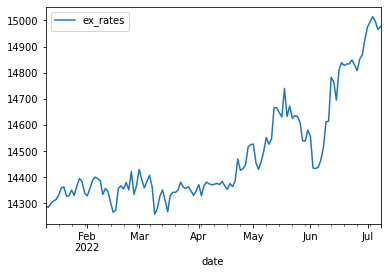

In [329]:
df.plot()

### Implementing your webscrapping to the flask dashboard

- Copy paste all of your web scrapping process to the desired position on the `app.py`
- Changing the title of the dasboard at `index.html`

## Finishing This Notebook with Your Analysis and Conclusion

First you can do start with making the data visualisation. 

To make further analysis we will create a new dataframe called `df1` by copying `df` using `.copy()` , after that we will add a column named `period` to store month name information using `dt.month_name()`. Because in the previous dataframe the `date` column was set to `index`, we need to reset the index so that the `dt.month_name()` method which takes the value from `date` can run. After that we will return the position of `date` to index.

In [330]:
df1 = df.copy() #copy df to df1
df1.reset_index(inplace =True) #reset index, date become a column
df1['period'] = df1['date'].dt.month_name().astype('category') #change period data types as category
df1.set_index('date') #set date as index
df1.head()

,date,day,ex_rates,period
0,2022-01-10,Monday,14290.15000,January
1,2022-01-11,Tuesday,14284.46501,January
2,2022-01-12,Wednesday,14298.95000,January
3,2022-01-13,Thursday,14309.00000,January
4,2022-01-14,Friday,14314.55000,January


In [331]:
#Sort the names of the months in order
ordered_month = ['January', 'February', 'March', 'April', 'May', 'June', 'July']
df1['period'] = df1['period'].cat.reorder_categories(ordered_month)

The next step is to analyze the average value, the highest value and the lowest value for each `period` using the `.pd.crosstab()` method and slicing operator `.loc`.

In [332]:
#display the average exchange rates by month
pd.crosstab(
    index = df1['period'],
    columns ='Mean Rates',
    values = df1['ex_rates'],
    aggfunc ='mean'
).round(2)

col_0,Mean Rates
period,
January,14335.80
February,14353.35
March,14347.25
April,14398.29
May,14582.41
June,14708.57
July,14987.13


In [333]:
#display average exchange rates all data
df1.mean().round(2)

C:\Users\USER\AppData\Local\Temp\ipykernel_9732\2203723095.py:2: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df1.mean().round(2)
C:\Users\USER\AppData\Local\Temp\ipykernel_9732\2203723095.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df1.mean().round(2)


ex_rates    14485.5
dtype: float64

In [334]:
#Display the highest exchange rates 
df1_max = df1.loc[df1.groupby(df.index.month)['ex_rates'].idxmax().values].set_index('date').\
            sort_values(by ='ex_rates', ascending=False).round(2)
df1_max

,day,ex_rates,period
date,,,
2022-07-05,Tuesday,15014.65,July
2022-06-30,Thursday,14928.80,June
2022-05-18,Wednesday,14740.05,May
2022-04-29,Friday,14525.10,April
2022-03-01,Tuesday,14429.84,March
2022-02-24,Thursday,14421.45,February
2022-01-27,Thursday,14395.00,January


<AxesSubplot:xlabel='date'>

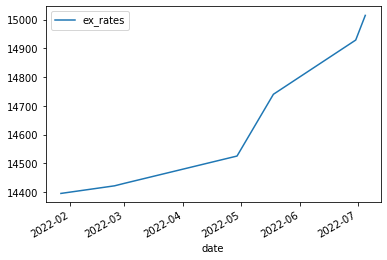

In [335]:
df1_max.plot()

In [336]:
#display the lowest exchange rates
df1_min = df1.loc[df1.groupby(df.index.month)['ex_rates'].idxmin().values].set_index('date').\
            sort_values(by ='ex_rates', ascending = True).round(2)
df1_min

,day,ex_rates,period
date,,,
2022-03-09,Wednesday,14257.95,March
2022-02-15,Tuesday,14265.45,February
2022-01-11,Tuesday,14284.47,January
2022-04-04,Monday,14328.90,April
2022-05-04,Wednesday,14430.00,May
2022-06-03,Friday,14433.50,June
2022-07-07,Thursday,14964.65,July


<AxesSubplot:xlabel='date'>

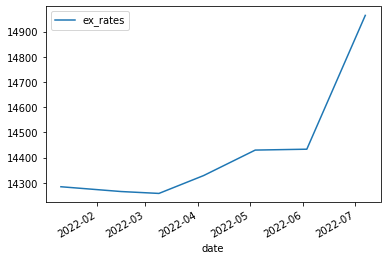

In [337]:
df1_min.plot()

## Conclusion

From the datas and charts that we have obtained previously, the conclusion can be drawn as follow:

<img src="asset/image1.png">

1. The exchange rate of the Rupiah against the USD in January to March fluctuated in the range of Rp. 14,300 to Rp. 14,400.
2. From April to mid-May, the Rupiah tends to depreciate to close to Rp. 14,800. 
3. At the end of May to early June the Rupiah had experienced a strengthening, but weakened again to its highest peak in July which reached the range of Rp. 15,000,-
3. The average exchange rate of Rupiah against USD for the period of January 10 to July 8 was recorded at Rp. 14,485.5 with the highest average exchange rate in July of Rp. 14,987.13 and the lowest exchange rate in January of Rp. 14,335.80
4. The highest exchange rate of Rupiah against USD was recorded on Tuesday, July 5, 2022 at Rp. 15,014.65, while the lowest exchange rate was recorded on Wednesday, March 9, 2022, at Rp. 14,257.95.


### Extra Challange

This will be not included to the scoring. 

- You can create additional analysis from the data.
- Implement it to the dashboard with at `app.py` dan `index.html`.